# Гаспарянц Артём НММбд-01-22

In [36]:
from PIL import Image
import numpy as np


img = Image.open('anime.jpg') 
X = np.array(img, dtype=np.float32) 
# print(X.shape)

def f(X, singval):
    U, S, V = np.linalg.svd(X, full_matrices=False) 
    helper = np.diag(np.concatenate((S[:singval], np.zeros(len(S) - singval)), dtype=np.float32))
    matrix = U.dot(helper.dot(V))
    matrix[matrix > 255] = 255
    matrix[matrix < 0] = 0
    return matrix

singularValues = [1, 3, 10, 30, 100]

r = 1
for sv in singularValues:
    m1 = f(X[:,:,0], sv)
    m2 = f(X[:,:,1], sv)
    m3 = f(X[:,:,2], sv)
    Y_r = np.zeros(X.shape)
    Y_r[:,:,0] = m1
    Y_r[:,:,1] = m2
    Y_r[:,:,2] = m3
    Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.jpg')
    r += 1

Посмотрим на картинку с 100 сингулярными значениями

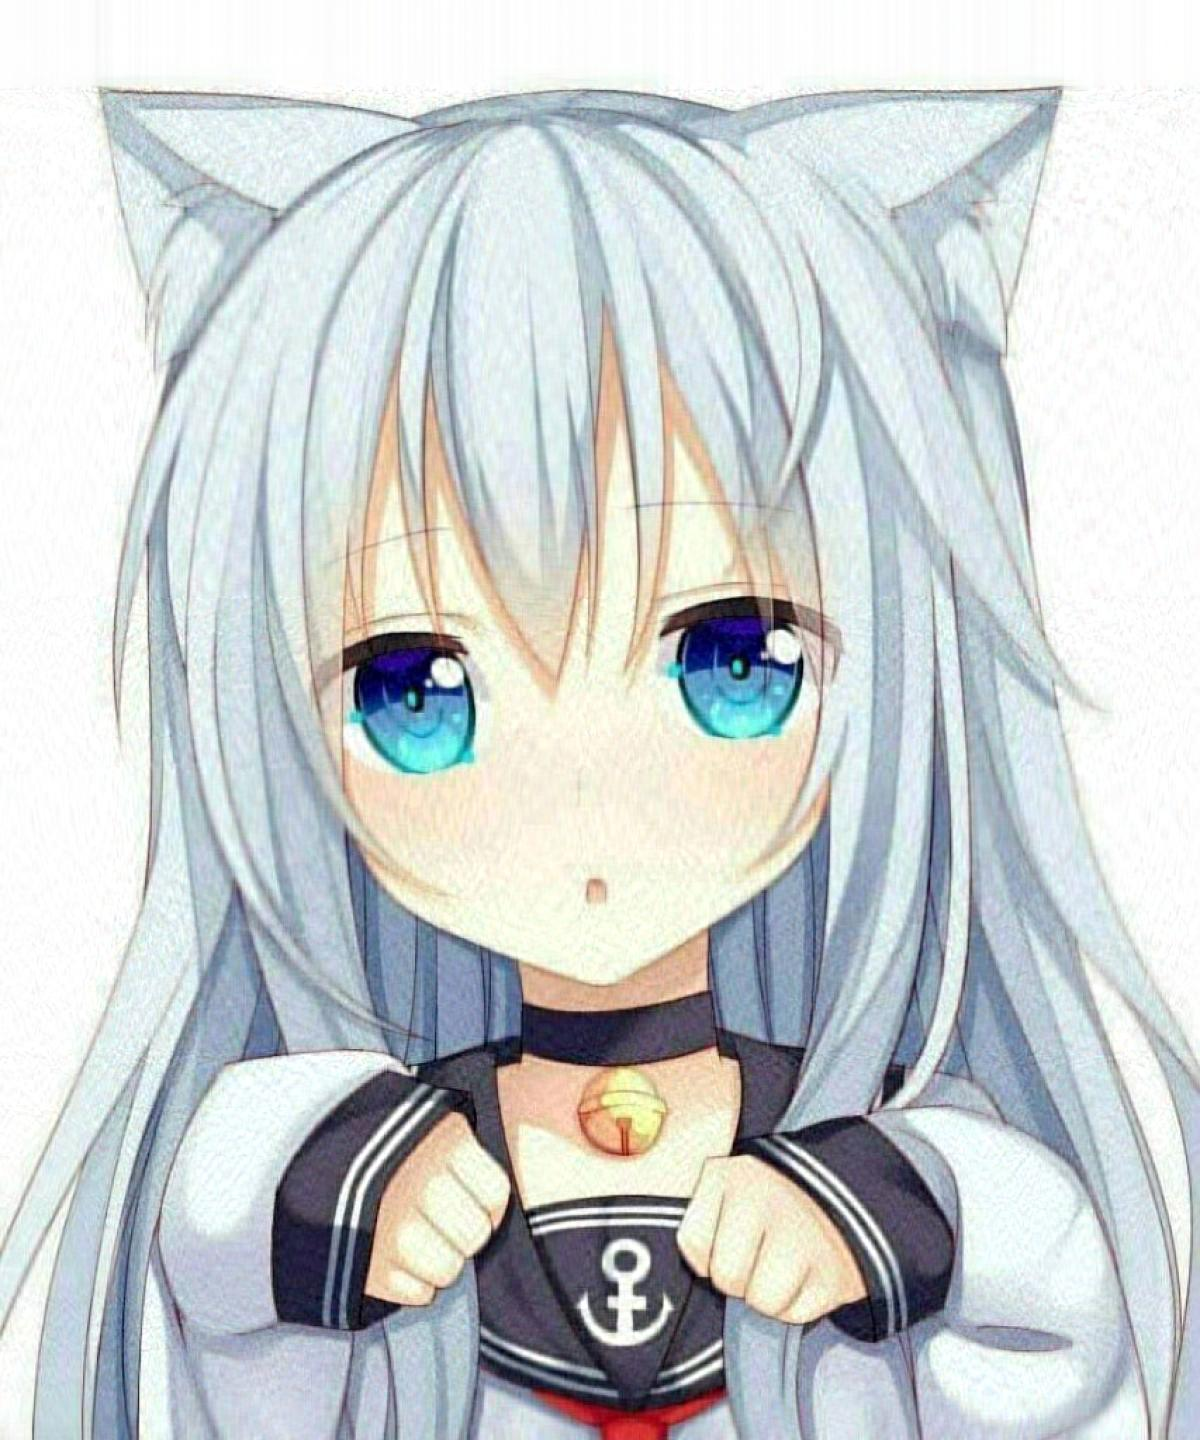

In [39]:
img = Image.open('5.jpg') 
img

Теперь посмотрим на размеры получившихся файлов

In [40]:
import os

for i in range(1, 6):
    print(os.path.getsize(f'{i}.jpg'))

71888
93811
118843
159419
195234


Сжатие работает!